## 1. Generate effective frontier combinations by Monte Carlo simulation

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd 
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [0]:
##import data
#data2=pd.read_csv('/content/drive/My Drive/Colab Notebooks/SharePrices.csv',encoding='gbk',index_col='Date')
data2=pd.read_csv('/content/drive/My Drive/Colab Notebooks/SharesPrices3.csv',encoding='gbk',index_col='Date')
#data2=pd.read_csv('/content/drive/My Drive/Colab Notebooks/SharePrice1.csv',encoding='gbk',index_col='Date')
data2

,HSBA,BARC,BA,VOD,BATS
Date,,,,,
1/22/16,4.795,1.908,4.927,2.194,36.255
1/25/16,4.734,1.818,4.958,2.185,36.570
1/26/16,4.745,1.830,5.025,2.186,36.830
1/27/16,4.801,1.818,5.070,2.232,37.640
1/28/16,4.776,1.784,5.055,2.153,37.685
1/29/16,4.923,1.860,5.160,2.239,38.970
2/1/16,4.844,1.828,5.090,2.254,38.640
2/2/16,4.676,1.738,5.010,2.215,38.565
2/3/16,4.494,1.656,4.863,2.129,38.050


*Calculate the expected return rate and volatility of the stock portfolio under different weights, and use it to map the income fluctuations of the stock portfolio under different weights.*

In [0]:
log_returns=np.log(data2.pct_change()+1)
number = 10000 
stock_num=len(log_returns.columns)#Number of shares
weights=np.random.rand(number, stock_num)
weights/=np.sum(weights, axis = 1).reshape(number,1) 
pret=np.dot(weights, log_returns.mean()*250)#Expected annualized return on stock portfolio
pvol=np.diag(np.sqrt(np.dot(weights,np.dot(log_returns.cov()*250,weights.T))))#Expected annualized volatility of stock portfolios

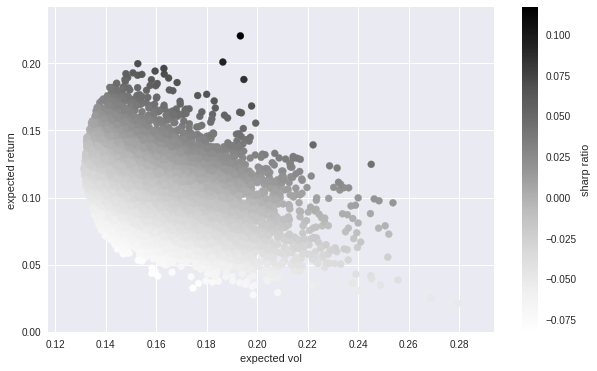

In [0]:
plt.figure(figsize=(10,6))
plt.scatter(pvol,pret,c=pret-0.02/pvol,marker='o')
plt.xlabel('expected vol')
plt.ylabel('expected return')
plt.grid(True)
plt.colorbar(label='sharp ratio')

## 2.Identify the most optimal portfolio in these combinations

In [0]:
import scipy.optimize as sco

*Write the optimized constraints, the convention of the minimum function is expressed as follows*

In [0]:
cons=({'type':'eq','fun': lambda x: np.sum(x)-1})#The constraint is that the sum of all parameters (weights) is 1.
bnd=tuple((0,1) for i in range(stock_num))##We also limit the parameter value (weight) between 0 and 1. These values are supplied to the minimized function in a tuple of multiple tuples.

*Write the calculation function of the target variable (3) The target combination for solving the Sharpe maximization, risk minimization, and maximization of profit*

In [0]:
def statistics(weights):
    weights=np.array(weights)
    pret=np.dot(weights, log_returns.mean()*252)#Expected annualized return on stock portfolio
    pvol=np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*252,weights)))#Expected annualized volatility of stock portfolios
    return np.array([pret, pvol, pret-0.02/pvol])

###Solving the combined weight of the maximum expected return
def min_neg_pret(weights):
    return  -1*statistics(weights)[0] 
opts_maxReturn=sco.minimize(min_neg_pret, stock_num*[1/stock_num], method='SLSQP', bounds=bnd, constraints=cons)
print(opts_maxReturn['x'].round(3))
print(statistics(opts_maxReturn['x']))

 ###Solving combination weights with minimized volatility
def min_vol(weights):
    return statistics(weights)[1] 
opts_minVolatility = sco.minimize(min_vol, stock_num*[1/stock_num], method='SLSQP',bounds=bnd, constraints=cons)
print(opts_minVolatility['x'].round(3))
print(statistics(opts_minVolatility['x']))

###Solve the largest combination weight of the Sharpe rate
def min_neg_sharp(weights):
    return -1*statistics(weights)[2]
opts_maxSharpRatio = sco.minimize(min_neg_sharp, stock_num*[1/stock_num], method='SLSQP', bounds=bnd, constraints=cons)
print(opts_maxSharpRatio['x'].round(3))
print(statistics(opts_maxSharpRatio['x'])) #Expected rate of return, expected volatility, and SharpRatio

[1. 0. 0. 0. 0.]
[0.25323154 0.20935988 0.15770225]
[0.191 0.    0.296 0.218 0.295]
[ 0.1269365   0.13173895 -0.02487889]
[1. 0. 0. 0. 0.]
[0.25323154 0.20935988 0.15770225]


*Calculate the Markowitz Efficient Frontier*

In [0]:
trets=np.linspace(0.12,0.21,50)
tvols=[]
 
for trets_i in trets:
    cons1=({'type':'eq','fun': lambda x: np.sum(x)-1},{'type':'eq','fun': lambda y: statistics(y)[0]-trets_i})#Constraint is the sum of all parameters (weights) is 1, and the expected return is equal to the target return
    res=sco.minimize(min_vol,stock_num*[1/stock_num], method='SLSQP', bounds=bnd, constraints=cons1)
    tvols.append(res['fun'])
tvols=np.array(tvols)


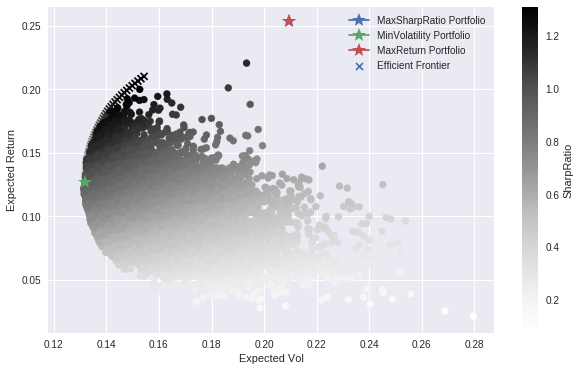

In [0]:
##plot
plt.figure(figsize=(10,6))
plt.scatter(tvols, trets,marker='x',c=trets/tvols, label='Efficient Frontier')
plt.scatter(pvol, pret, marker='o', c=pret/pvol)
plt.colorbar(label='SharpRatio')

plt.plot(statistics(opts_maxSharpRatio['x'])[1],statistics(opts_maxSharpRatio['x'])[0],marker='*',markersize=15,label='MaxSharpRatio Portfolio')
plt.plot(statistics(opts_minVolatility['x'])[1],statistics(opts_minVolatility['x'])[0],marker='*',markersize=15,label='MinVolatility Portfolio')
plt.plot(statistics(opts_maxReturn['x'])[1],statistics(opts_maxReturn['x'])[0],marker='*',markersize=15,label='MaxReturn Portfolio')
plt.grid(True)

plt.xlabel('Expected Vol')
plt.ylabel('Expected Return')
plt.legend()



In [0]:
i=0
max_pret=pret[0]
flag_pret=0
min_pvol=pvol[0]
flag_pvol=0
SharpRatio=[]
max_sr=0
flag_sr=0
for i in range (len (pret)):
  #if sum(weights[i]==1) :
    SharpRatio.append(pret[i]/pvol[i])
    if pret[i]>max_pret:
        max_pret=pret[i]
        flag_pret=i
    if pvol[i]<min_pvol:
        min_pvol=pvol[i]
        flag_pvol=i
    if pret[i]/pvol[i]>max_sr:
      max_sr=pret[i]/pvol[i]
      flag_sr=i
print (max_pret,flag_pret)
print (min_pvol,flag_pvol)
print (max_sr,flag_sr)

0.17867399830364555 8898
0.12711659217363747 2709
1.1423133852001648 8881


In [0]:
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [0]:
data2=pd.read_csv('/content/drive/My Drive/Colab Notebooks/SharesPrices3.csv',encoding='gbk',index_col='Date')
data=np.log(data2.pct_change()+1)
returns_annual = data.mean() * 252
cov_annual = data.cov() * 252
number_assets = 5
weights = np.random.random(number_assets)
weights /= np.sum(weights)

portfolio_returns = []
portfolio_volatilities = []
sharpe_ratio = []
for single_portfolio in range (50000):
      weights = np.random.random(number_assets)
      weights /= np.sum(weights) 
      returns = np.dot(weights, returns_annual)
      volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
      portfolio_returns.append(returns)
      portfolio_volatilities.append(volatility)
      sharpe = returns / volatility
      sharpe_ratio.append(sharpe)

portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)



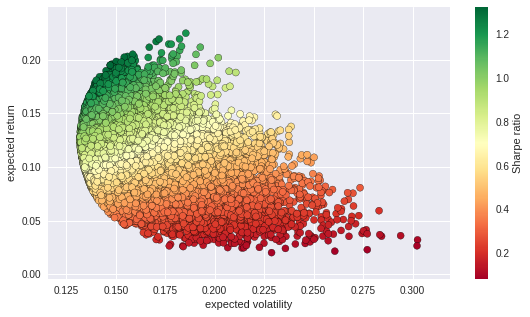

In [0]:
plt.style.use('seaborn-dark')
plt.figure(figsize=(9, 5))
plt.scatter(portfolio_volatilities, portfolio_returns, c=sharpe_ratio,cmap='RdYlGn', edgecolors='black',marker='o') 
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')



In [0]:
def statistics(weights):        
    weights = np.array(weights)
    pret = np.sum(data.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(data.cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol])

def min_func_sharpe(weights):
    return -statistics(weights)[2]

bnds = tuple((0, 1) for x in range(number_assets))
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
opts = sco.minimize(min_func_sharpe, number_assets * [1. / number_assets,], method='SLSQP',  bounds=bnds, constraints=cons)
opts['x'].round(3)  #得到各股票权重
statistics(opts['x']).round(3)  #得到投资组合预期收益率、预期波动率以及夏普比率

array([0.214, 0.154, 1.396])

In [0]:
opts['x'].round(3)  #得到各股票权重

array([0.504, 0.   , 0.   , 0.   , 0.326, 0.009, 0.   , 0.   , 0.   ,
       0.161])